CIFAR10 이미지를 미리 학습된 모델의 입력크기에 맞게 조정하고 사용해봅시다.

train_images <class 'numpy.ndarray'> (50000, 32, 32, 3) uint8
train_labels <class 'numpy.ndarray'> (50000, 1) uint8
test_images <class 'numpy.ndarray'> (10000, 32, 32, 3) uint8
test_labels <class 'numpy.ndarray'> (10000, 1) uint8


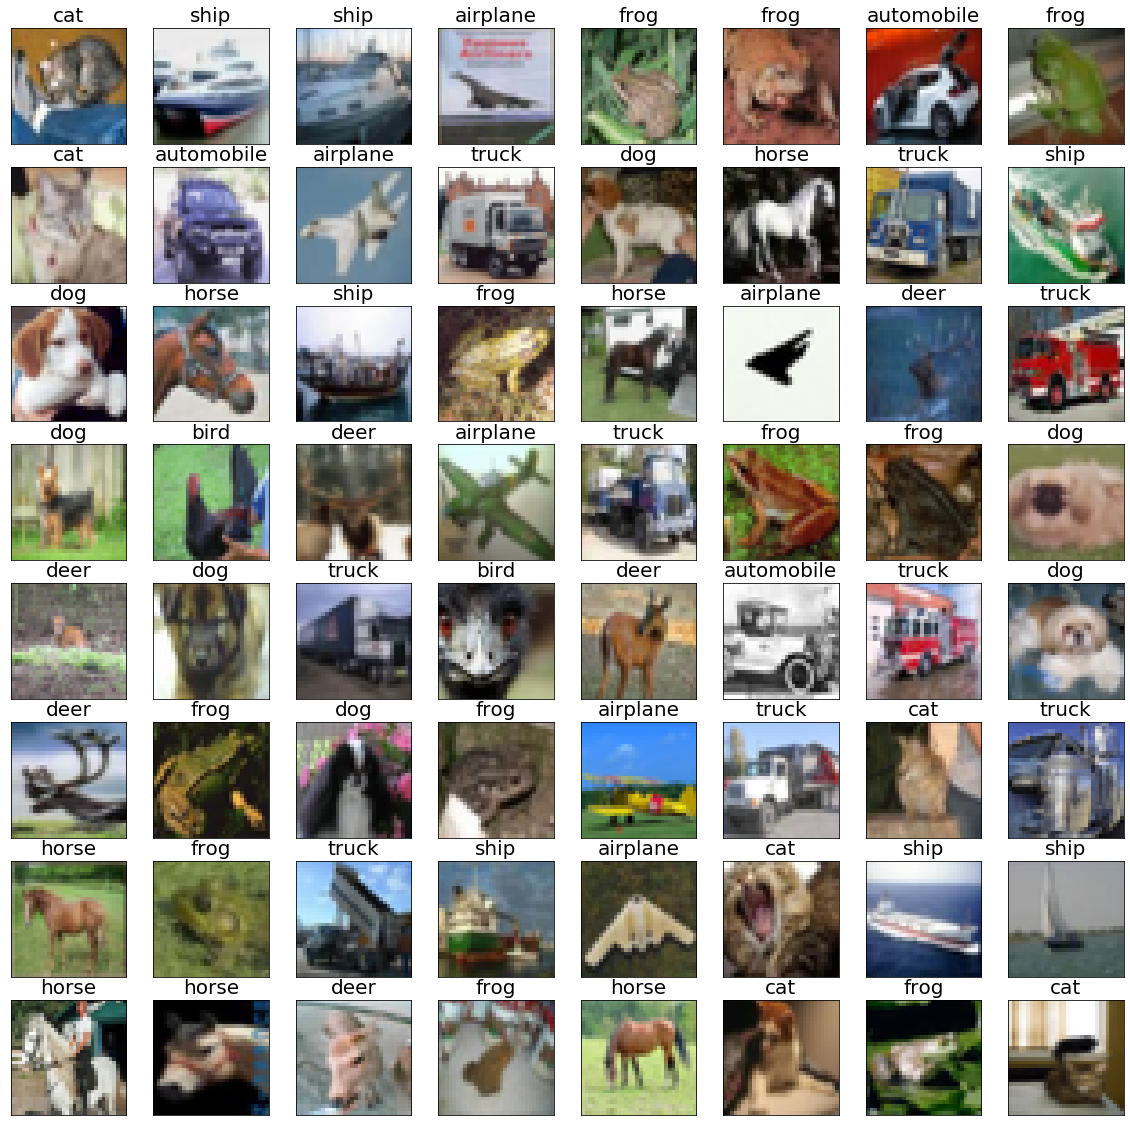

In [1]:
from tensorflow.keras import datasets, layers, models, utils
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()

print( 'train_images', type(train_images), train_images.shape, train_images.dtype )
print( 'train_labels', type(train_labels), train_labels.shape, train_labels.dtype )
print( 'test_images', type(test_images), test_images.shape, test_images.dtype )
print( 'test_labels', type(test_labels), test_labels.shape, test_labels.dtype )

class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck' ]

plt.figure( figsize=(20,20) )
for i in range(0, 8*8):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( class_names[test_labels[i][0]], {'fontsize':20} )
    plt.imshow( test_images[i] )

사용할 모델을 불러옵니다.

In [2]:
#from tensorflow.keras.applications.resnet50 import ResNet50 as pre_model
#from tensorflow.keras.applications.resnet50 import preprocess_input, decode_predictions

#from tensorflow.keras.applications.xception import Xception as pre_model
#from tensorflow.keras.applications.xception import preprocess_input, decode_predictions

#from tensorflow.keras.applications.vgg16 import VGG16 as pre_model
#from tensorflow.keras.applications.vgg16 import preprocess_input, decode_predictions

#from tensorflow.keras.applications.vgg19 import VGG19 as pre_model
#from tensorflow.keras.applications.vgg19 import preprocess_input, decode_predictions

from tensorflow.keras.applications.inception_v3 import InceptionV3 as pre_model
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

model = pre_model( weights='imagenet' )
model.summary()

Model: "inception_v3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 299, 299, 3) 0                                            
__________________________________________________________________________________________________
conv2d (Conv2D)                 (None, 149, 149, 32) 864         input_1[0][0]                    
__________________________________________________________________________________________________
batch_normalization (BatchNorma (None, 149, 149, 32) 96          conv2d[0][0]                     
__________________________________________________________________________________________________
activation (Activation)         (None, 149, 149, 32) 0           batch_normalization[0][0]        
_______________________________________________________________________________________

CIFAR10 이미지를 모델의 입력크기에 맞게 리사이즈해주고 사용합니다. 불러온 모델은 CIFAR10 이미지에 특화된 모델이 아니기때문에 틀리게 출력되는 분류들도 있는것을 알 수 있습니다.

test_images_resized (64, 299, 299, 3) float64
0.0 255.0


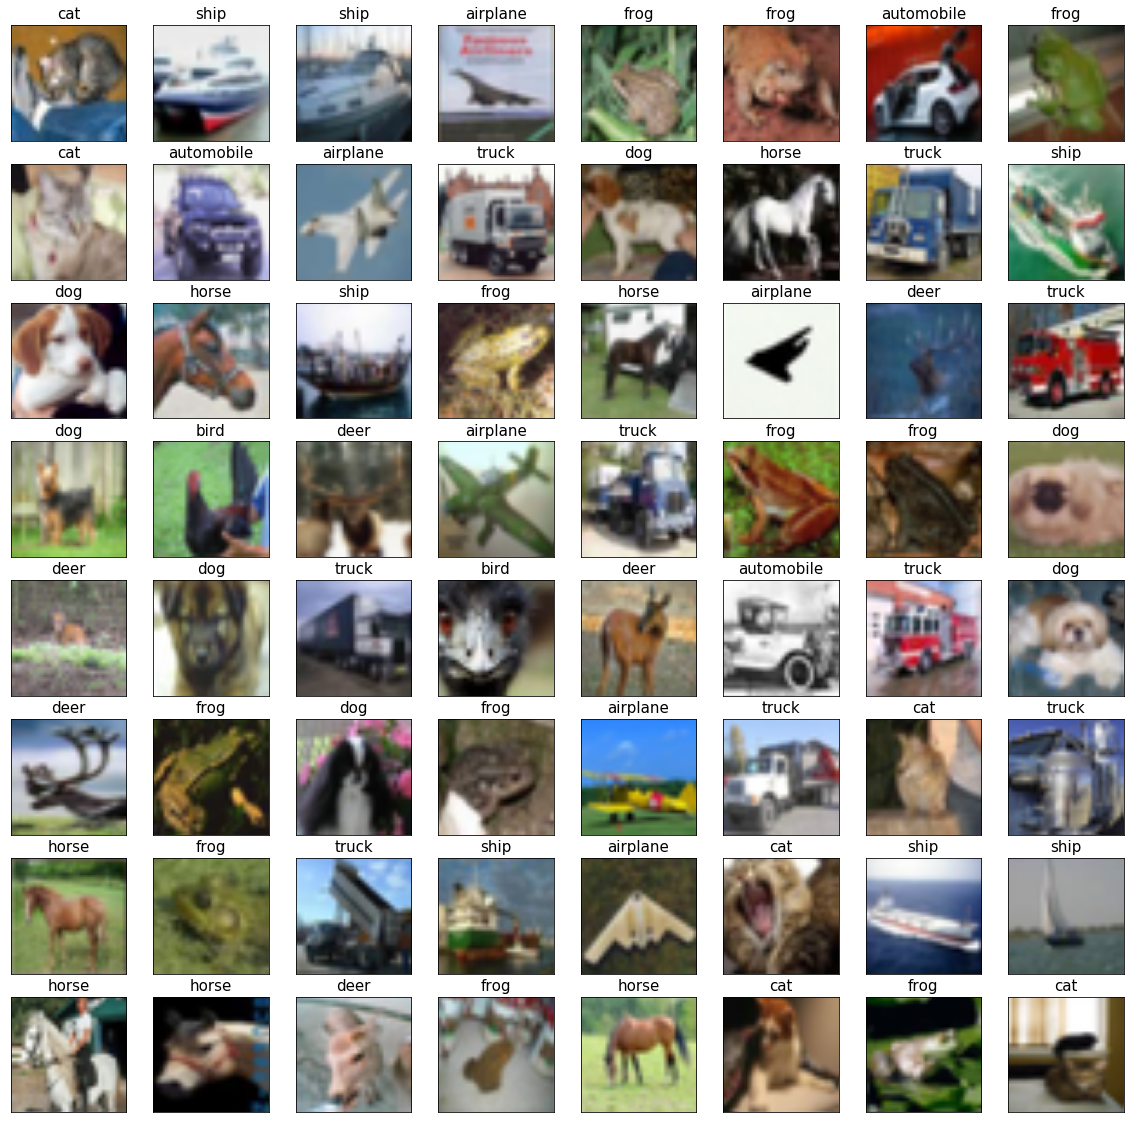

x (64, 299, 299, 3) float64
preds
[[7.1062037e-05 2.2405415e-04 5.9962036e-05 ... 8.0690654e-05
  7.4452779e-05 1.4074559e-05]
 [1.7107780e-04 3.0010307e-04 3.1364118e-04 ... 3.2459505e-04
  1.6278986e-04 5.1942785e-05]
 [1.7363709e-04 6.2863686e-04 8.0448131e-05 ... 1.5136419e-04
  2.1076003e-04 8.8425790e-05]
 ...
 [8.0060172e-06 4.7304769e-05 3.3327462e-05 ... 1.0783542e-05
  1.0533662e-05 6.7950954e-05]
 [1.1041345e-03 1.7179647e-03 4.6876688e-05 ... 1.3996410e-03
  5.7644991e-04 3.4280005e-05]
 [8.6558648e-06 5.4371896e-05 9.3048002e-06 ... 7.1596883e-06
  2.1746526e-05 6.4826836e-06]] 

decoded_preds
[[('n02951585', 'can_opener', 0.18828367), ('n02100236', 'German_short-haired_pointer', 0.098316126), ('n03803284', 'muzzle', 0.07400741)], [('n04273569', 'speedboat', 0.13622543), ('n04612504', 'yawl', 0.08768331), ('n04483307', 'trimaran', 0.07313385)], [('n02704792', 'amphibian', 0.1253288), ('n04273569', 'speedboat', 0.11320234), ('n02981792', 'catamaran', 0.078307375)], [('n0379

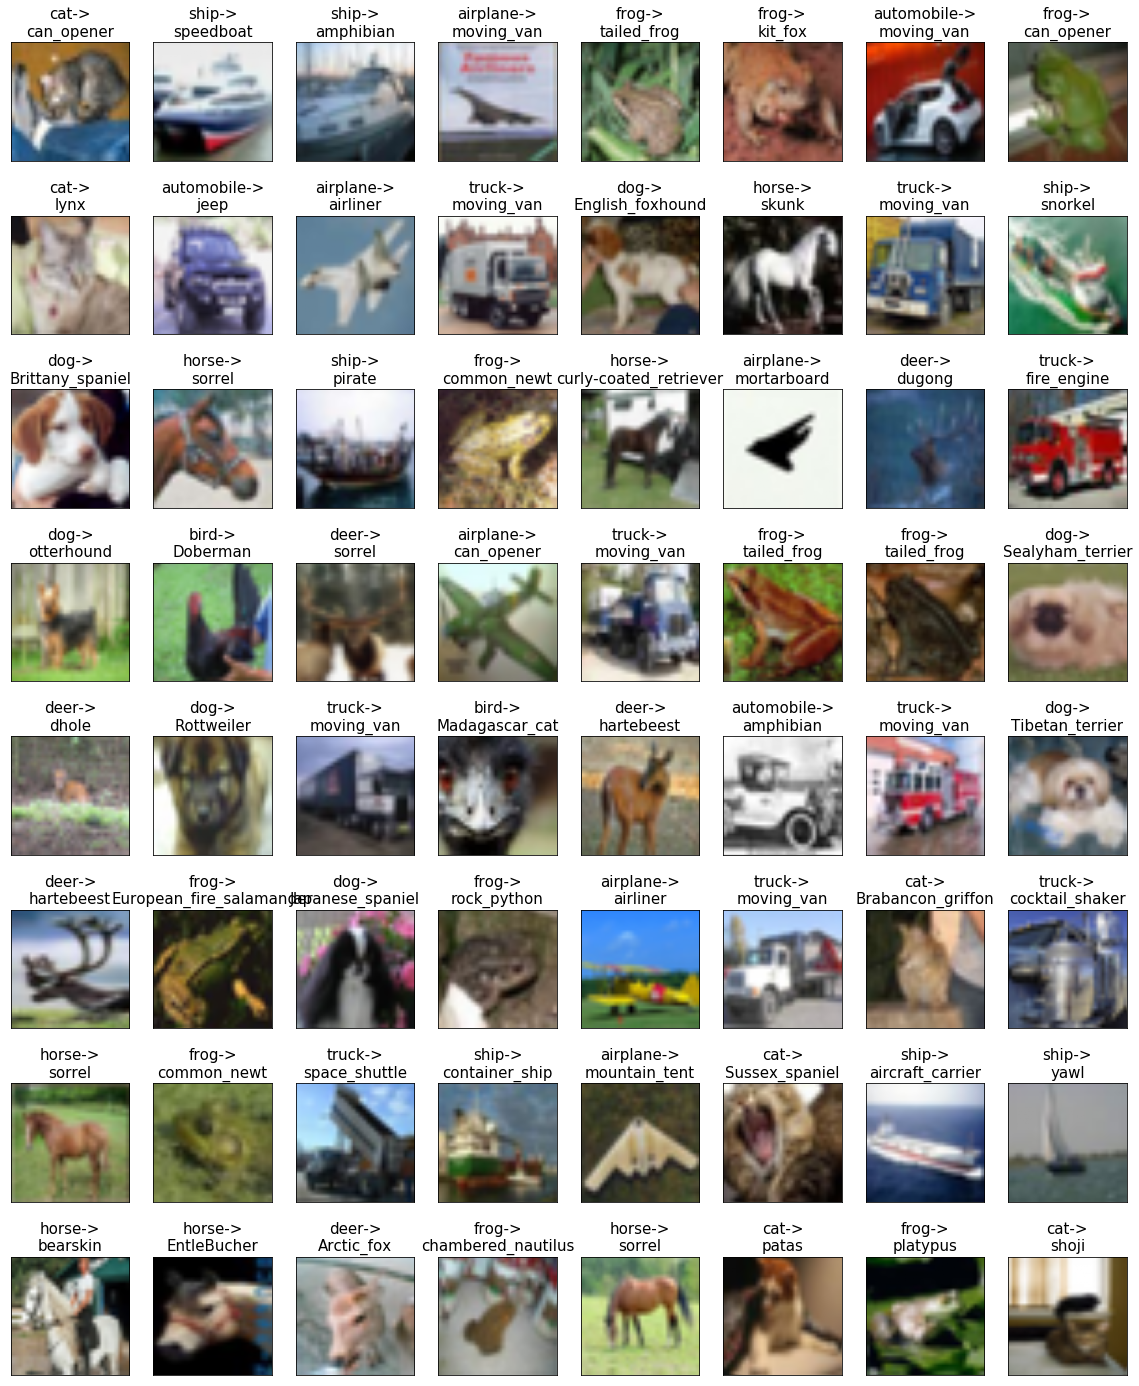

In [3]:
# pip install scikit-image
from skimage.transform import resize

Ntest = 64
test_images_resized = resize(test_images[0:Ntest], (Ntest, 299, 299, 3),
                             preserve_range=True, anti_aliasing=True)

print( 'test_images_resized', test_images_resized.shape, test_images_resized.dtype )
print( test_images_resized.min(), test_images_resized.max() )

plt.figure(figsize=(20,20))
for i in range(0,Ntest):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( class_names[test_labels[i][0]], {'fontsize':15} )
    plt.imshow( test_images_resized[i].astype(np.uint8) )
plt.show()

# to prevent test_images_resized is changed by preprocess_input
x = test_images_resized.copy()
x = preprocess_input(x)
print( 'x', x.shape, x.dtype )

preds = model.predict(x, batch_size=8)
print('preds'); print(preds, '\n')
decoded_preds = decode_predictions(preds, top=3)
print('decoded_preds'); print(decoded_preds, '\n')
top_preds = [ x[0][1] for x in decoded_preds ]
print( 'top_preds' ); print( top_preds )

plt.figure(figsize=(20,25))
for i in range(0,64):
    plt.subplot(8,8,i+1)
    plt.xticks([]); plt.yticks([])
    plt.title( class_names[test_labels[i][0]] + '->\n' + top_preds[i], {'fontsize':15} )
    plt.imshow( test_images_resized[i].astype(np.uint8) )
plt.show()